In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def show_img(img,name='img', hstack=False):
    if not hstack:
        for i in range(len(img)):
            cv2.imshow(name + str(i), img[i])
    else:
        res = np.hstack(img)
        cv2.imshow("res", res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 模板匹配
模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [33]:
# 模板匹配
img = cv2.imread('../img/lena.jpg', 0)
template = cv2.imread('../img/face.jpg',0)
h,w = template.shape[:2]
show_img([img, template])

In [21]:
print(img.shape)
print(template.shape)

(263, 263)
(110, 85)


- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

公式：[https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d](https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d)

In [22]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# 模板匹配
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
# 最小值，最大值，最小值位置，最大值位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

4


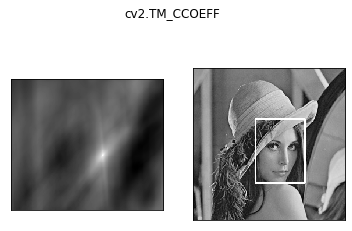

5


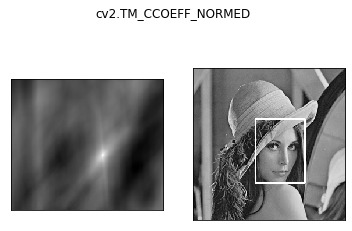

2


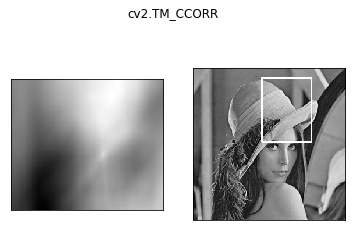

3


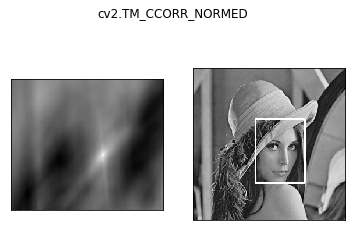

0


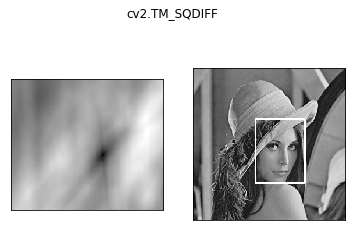

1


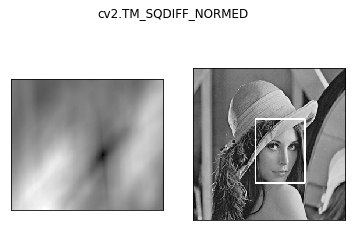

In [23]:
# 绘图比较
for meth in methods:
    img2 = img.copy()

    # 匹配方法的真值
    method = eval(meth)
    print (method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## 匹配多个对象

In [34]:
img_rgb = cv2.imread('../img/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../img/mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# 取匹配程度大于%80的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)

show_img([template, img_rgb])